In [20]:
import pandas as pd

import os
import sys  

# set path for pixelator directory 
sys.path.insert(0, "/Users/janrkauert/pixelator/")

# load functions from pixelator
from pixelator.pixeldataset import PixelDataset
from pixelator.graph import Graph

# load standard workflow single cell functions
from colocalization_measures.plot import plot_mutliple_markers
from colocalization_measures.higher_order_similarity import calculate_higher_order_similarity
from colocalization_measures.adjusted_local_assortativity import calculate_adjusted_local_assorativity
from colocalization_measures.colocalization_scores import create_colocalization_scores, create_higher_order_similarity_df

# get directory with graph eval files
path_name = "C:/Users/janrh/Downloads/Pixelator_data"

In [21]:
marker_names = ["CD52", "CD16", "CD47", "CD18", "HLA-ABC", "CD29", "CD26", "B2M",
                "CD48", "CD50", "CD162", "CD37", "CD86", "CD7", "CD2", "CD3E", "CD59",
                "CD43", "CD44", "CD45", "CD45RB"]

In [22]:
marker_names = ["CD37", "CD43", "CD44", "CD50", "CD54", "CD102", "CD162", "CD11a", "CD18","mIgG1"]

In [23]:
path_data = "C:/Users/janrh/Documents/GitHub/TDA-local-assortativity-paper/S0"

# calculate pairwise colocalization scores
similarity_measure_df_S0 = create_colocalization_scores(marker_names, path_data)

In [24]:
path_data = "C:/Users/janrh/Documents/GitHub/TDA-local-assortativity-paper/S1"

# calculate pairwise colocalization scores
similarity_measure_df_S1 = create_colocalization_scores(marker_names, path_data)

In [25]:
path_data = "C:/Users/janrh/Documents/GitHub/TDA-local-assortativity-paper/S3"

# calculate pairwise colocalization scores
similarity_measure_df_S3 = create_colocalization_scores(marker_names, path_data)

In [26]:
from upsetplot import UpSet

def create_upset_plot(marker_names, similarity_measure_df):
    # create new dataframe for the upset plot as this requires a specific type of structure
    upset_plot_df = pd.DataFrame()

    # iterate through all maker names to get boolean values if they are part of the current combination
    for marker in marker_names:
        # true or false values for each marker combination
        true_false_values = [marker in set(combination_name.split("_")) for combination_name in similarity_measure_df.index.values.tolist()]
        
        # add boolean values to dataframe
        upset_plot_df[marker] = true_false_values

    # combine scores with a chosen metric and save as scores (required by UpSet plot)
    upset_plot_df["scores"] = similarity_measure_df.mean(axis=1).values

    # set index to combination names
    upset_plot_df = upset_plot_df.set_index(marker_names)

    # plot upset diagram
    upset_plot = UpSet(upset_plot_df, sum_over="scores", sort_categories_by="input")

    return upset_plot

In [27]:
similarity_measure_df_S0 = similarity_measure_df_S0.T
similarity_measure_df_S0["scale2"] = [0.3] * len(similarity_measure_df_S0)
similarity_measure_df_S0 = similarity_measure_df_S0.T

similarity_measure_df_S1 = similarity_measure_df_S1.T
similarity_measure_df_S1["scale2"] = [0.3] * len(similarity_measure_df_S1)
similarity_measure_df_S1 = similarity_measure_df_S1.T

similarity_measure_df_S3 = similarity_measure_df_S3.T
similarity_measure_df_S3["scale2"] = [0.3] * len(similarity_measure_df_S3)
similarity_measure_df_S3 = similarity_measure_df_S3.T

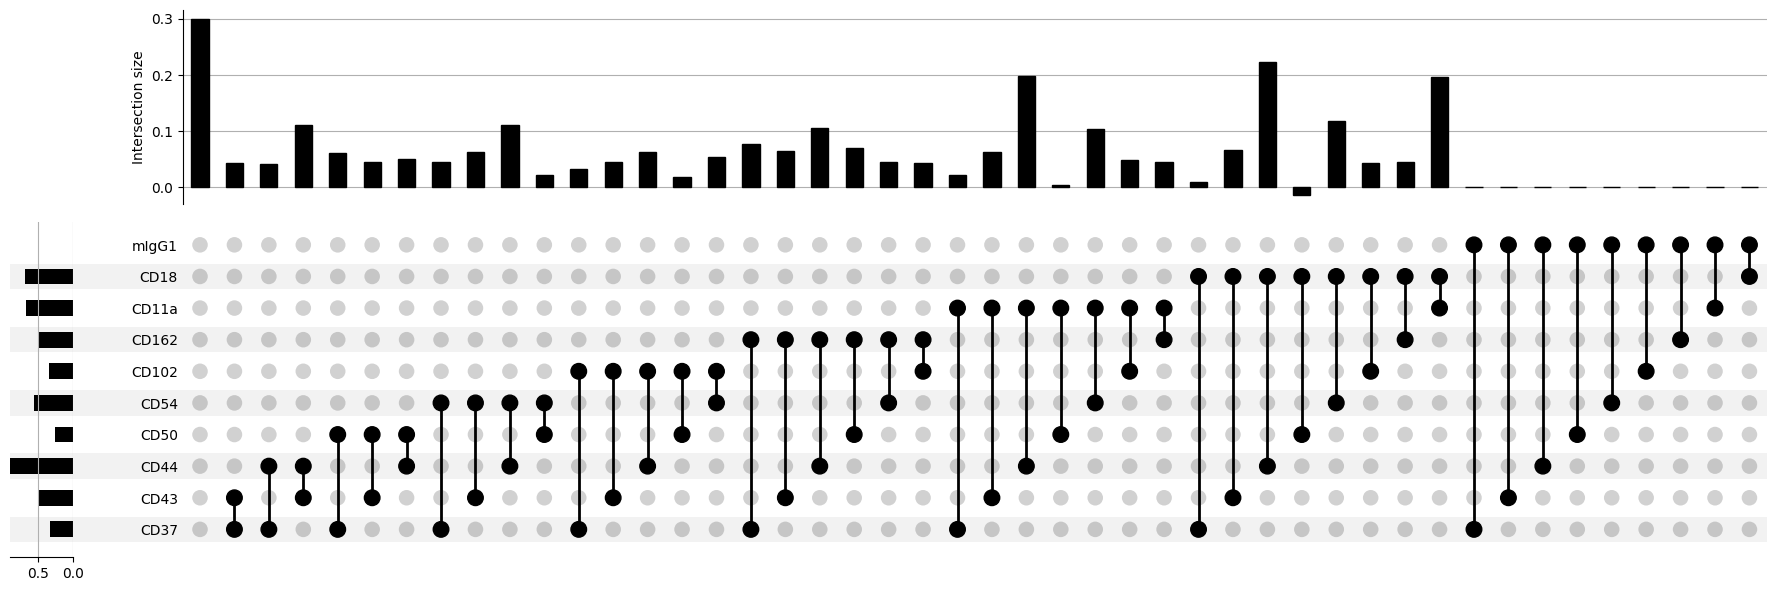

In [28]:
# plot scores
create_upset_plot(marker_names, similarity_measure_df_S0).plot();

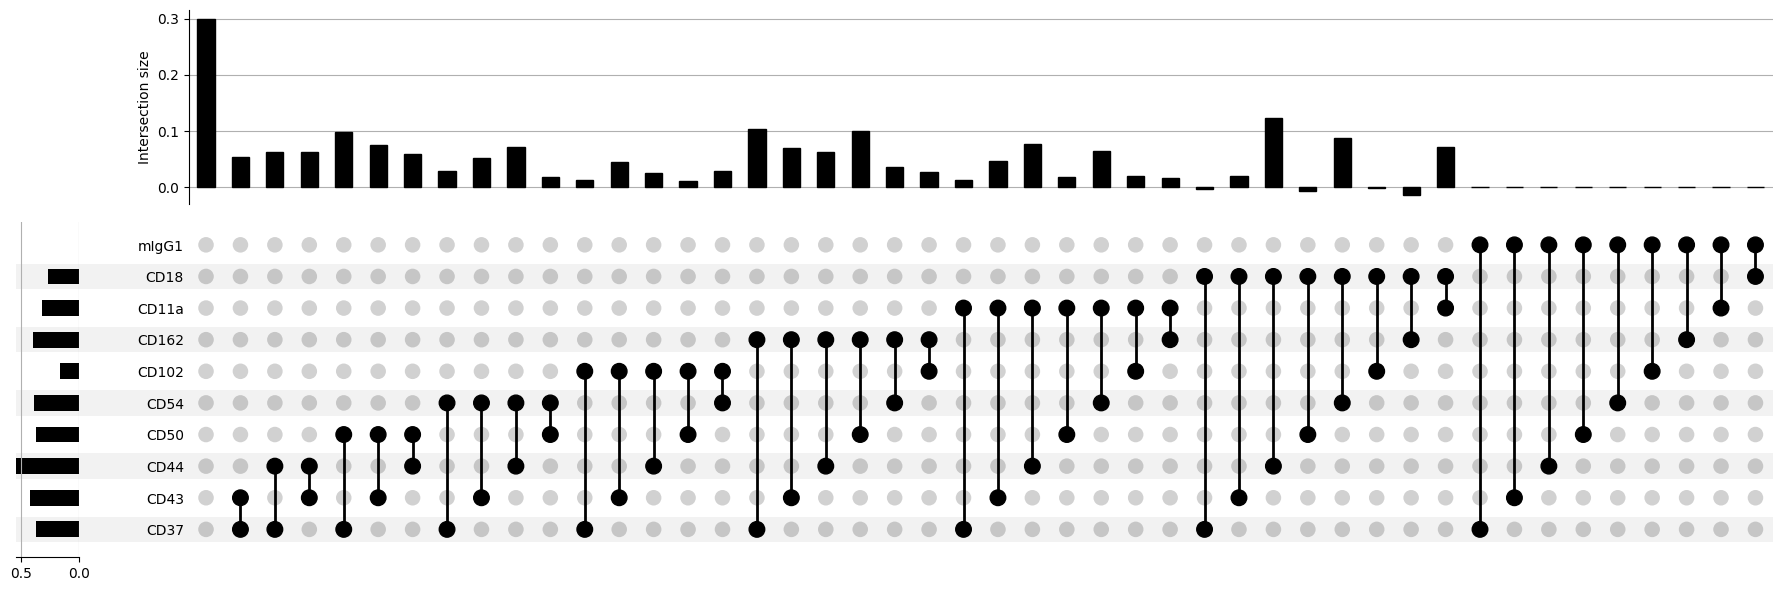

In [29]:
# plot scores
create_upset_plot(marker_names, similarity_measure_df_S1).plot();

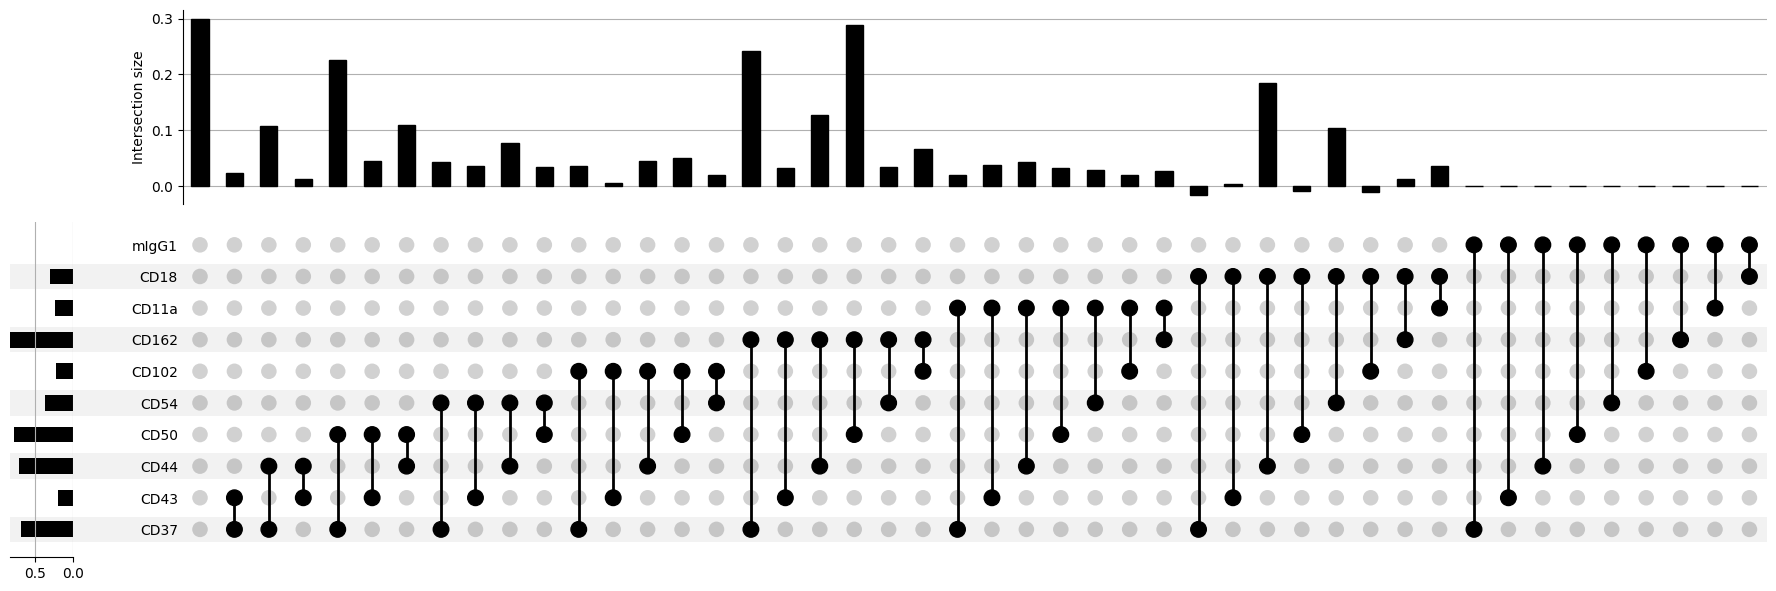

In [30]:
# plot scores
create_upset_plot(marker_names, similarity_measure_df_S3).plot();

Higher order plots

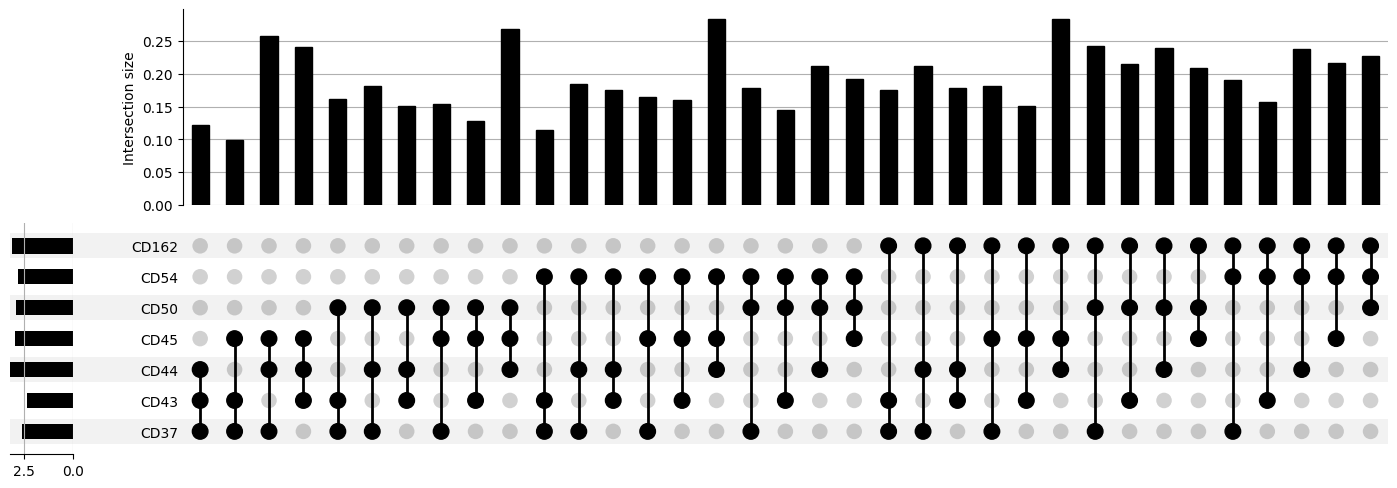

In [34]:
marker_names =  ["CD37", "CD43", "CD44", "CD45", "CD50", "CD54", "CD162"]
path_data_S3 = "C:/Users/janrh/Documents/GitHub/TDA-local-assortativity-paper/S3"

# calculate pairwise colocalization scores
similarity_measure_df_S3 = create_higher_order_similarity_df(marker_names, path_data_S3, 3)

# plot scores
create_upset_plot(marker_names, similarity_measure_df_S3).plot();